# OER-Bot Themaopdracht

### Notebook door Groep High Five
### Note: Sommige code is geschreven met ChatGPT, dit zal vermeld staan in de tekst boven/ rondom de code.
### Note: Comments van de code zijn grotendeels geschreven met ChatGPT, dit betekent NIET dat de code zelf ook is geschreven met ChatGPT. Dit zal voor de code waar dat wel zo is, zoals hierboven beschreven, staan in de tekst boven/rondom de code. 

---

# Introductie

[[ go back to the top ]](#Table-of-contents)

In dit document wordt de toepassing van GUFF met 'geitje' in combinatie met een semDB verkend. Het doel is om een chatbot te creëren die vragen kan beantwoorden over het Onderwijs- en Examenreglement (OER). We leggen stapsgewijs uit hoe we het OER-bot project hebben aangepakt volgens de CRISP-DM-methode.

We beginnen met de **Business Understanding**, waarin we de casus en de eindvisie toelichten. Vervolgens bespreken we de **Data Understanding**, waar we ingaan op het aangeleverde Word-bestand en de bevindingen die we hebben gedaan. Bij de **Data Preparation** leggen we uit hoe we het Word-bestand hebben omgezet naar een bruikbaar formaat voor ons model. In de sectie **Modeling** beschrijven we hoe we zijn overgegaan van Mischa's notebook naar een Flask-app. Bij de **Evaluation** reflecteren we op het eindresultaat, en in de sectie **Deployment** bespreken we de beste vervolgstappen voor de Flask-app.

Deze opdracht is afkomstig van Hogeschool Windesheim, een Nederlandse instelling voor hoger onderwijs. De hogeschool biedt een breed scala aan bachelor- en masteropleidingen, waaronder programma's in techniek en sociale wetenschappen. Hogeschool Windesheim heeft verschillende vestigingen en telt ongeveer 1800 medewerkers in totaal.

---

# Business Understanding

[[ go back to the top ]](#Table-of-contents)

Hogeschool Windesheim heeft te maken met een probleem dat studenten onvoldoende het Onderwijs- en Examenreglement (OER) bestuderen. Het OER is een belangrijk document waarin de rechten en plichten van studenten staan beschreven, evenals de regels rondom tentamens en beoordelingen. Door de complexiteit van het OER vinden studenten het echter vaak lastig om deze informatie te begrijpen en toe te passen. Dit leidt tot vragen, misverstanden en mogelijk onnodige fouten tijdens hun studie.

Windesheim ondervindt dat studenten het Onderwijs- en Examenreglement (OER) onvoldoende bestuderen. Dit gebrek aan begrip kan leiden tot verwarring en onzekerheid bij studenten over hun rechten en plichten binnen het onderwijs. Om deze uitdaging aan te pakken, wil Windesheim een chatbot ontwikkelen die studenten helpt bij het beantwoorden van hun vragen over het OER. Deze chatbot biedt een gebruiksvriendelijke manier voor studenten om informatie te verkrijgen, waardoor zij beter in staat zijn om belangrijke details uit het OER tot zich te nemen.

### Oplossing
De chatbot biedt een oplossing om de toegankelijkheid van de informatie in het OER te verbeteren. Doormiddel van een chatbot kunnen studenten eenvoudig vragen stellen en direct antwoorden ontvangen. Dit helpt hen om op een gemakkelijkere en efficiëntere manier inzicht te krijgen in de inhoud van het OER, wat hen in staat stelt om beter geïnformeerde keuzes te maken over hun studie. De chatbot fungeert als een toegankelijke bron van informatie die altijd beschikbaar is.

### Wat gaan we oplossen?

We lossen op dat studenten op een eenvoudigere manier toegang hebben tot de informatie van het OER. Door een chatbot te ontwikkelen, kunnen studenten snel en effectief antwoorden krijgen op hun vragen, wat hen helpt de belangrijke documentatie beter te begrijpen en te gebruiken.

### Kritische Succesfactoren
Het project is succesvol wanneer er een volledig functionele chatbot is ontwikkeld binnen een Python-applicatie, inclusief een grafische gebruikersinterface (GUI) met Flask. Deze chatbot moet in staat zijn om relevante vragen te beantwoorden met informatie uit het OER-bestand. Daarnaast zijn de volgende kritische succesfactoren (KSF’s) van belang:

1. **Nauwkeurigheid van de antwoorden:** De chatbot moet vragen correct beantwoorden door zowel de juiste informatie uit de database te halen zonder onnodige details als de context te begrijpen.
2. **Efficiëntie van het systeem:** De chatbot moet snel en betrouwbaar antwoorden genereren, zelfs bij complexe vragen over het OER.
3. **Gebruiksvriendelijkheid:** De applicatie moet eenvoudig te gebruiken zijn en toegankelijk voor studenten zonder technische kennis.
4. **Onderbouwing van de keuzes:** Tijdens het ontwikkelingsproces moet de rationale achter de technische en ontwerpkeuzes duidelijk worden uitgelegd en gedocumenteerd.

### Kritieke Prestatie-indicatoren (KPI’s)
Om het succes van het project te meten, kunnen de volgende KPI's worden gebruikt:

1. **Nauwkeurigheid van de antwoorden:** Zelf controleren of de antwoorden van de chatbot overeenkomen met het OER.
2. **Efficiëntie van het systeem:** De gemiddelde tijd die de chatbot nodig heeft om een antwoord te genereren mag niet langer dan 30 seconden zijn.

### Context van de vraag
De context van de vraag is het ontwikkelen van een chatbot die studenten helpt informatie te vinden over het OER. Studenten hebben vaak moeite om deze documenten goed te begrijpen en de chatbot biedt een interactieve manier om antwoorden te verkrijgen en onduidelijkheden op te helderen. Hierdoor kunnen studenten beter geïnformeerde beslissingen nemen over hun studie.

### Ontwerp en Eindvisie
De eindvisie is om een functionele chatbot te creëren die studenten de mogelijkheid biedt om vragen te stellen over het OER. Dit zal de drempel voor het begrijpen van belangrijke informatie verlagen, waardoor studenten beter voorbereid zijn op hun studie. De chatbot moet geïntegreerd worden in een intuïtieve interface die ook op lange termijn door Windesheim eenvoudig te onderhouden en bij te werken is.

### Dataset en haalbaarheid
De dataset die is aangeleverd is het OER (Word-bestand). Er moet onderzoek worden gedaan naar hoe deze informatie effectief kan worden omgezet naar een gestructureerd formaat, zoals een database of JSON-bestand, dat de chatbot kan raadplegen. Indien dit lukt, kan de vraag worden opgelost met de gegeven dataset. Daarbij is het belangrijk om aandacht te besteden aan de juiste verwerking van de tekstuele informatie uit het OER, zodat de chatbot niet alleen tekst kan opzoeken, maar ook de betekenis en context van de vragen goed begrijpt.

---

# Data Understanding

[[ go back to the top ]](#Table-of-contents)

Voor deze themaopdracht pakken we het proces van de data understanding anders aan. We hebben een Word-bestand gekregen van het Onderwijs- en Examenreglement (OER), dat we op een zinvolle manier willen omzetten naar een semantische database (SemDB). Als eerste hebben we dit document gezamenlijk doorgenomen en gekeken naar de structuur en de inhoud.

Al snel kwamen we tot de conclusie dat bepaalde onderdelen in het document lastig waren om mee te werken voor in een SemDB. Een aantal van deze onderdelen zijn:

- Afbeeldingen
- Inhoud
- Tabellen
- Voorblad

``Afbeeldingen``: Afbeeldingen zijn voor ons model niet van toegevoegde waarde, aangezien de bot enkel tekstuele vragen over het OER gaat beantwoorden.



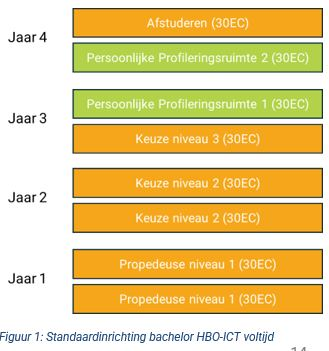

In [3]:
# In HTML zijn de afbeeldingen niet zichtbaar. Daarom heb ik onderstaande methode gebruikt om ze wel zichtbaar te maken
from IPython.display import Image, display
display(Image(filename='Afbeeldingen/afbeelding.JPG'))

``Inhoud``: De inhoudsopgave bevat alleen kopjes en hoofdstuktitels, wat geen relevante informatie oplevert voor het model. Het is daarom belangrijk om deze in de data preparation te verwijderen.

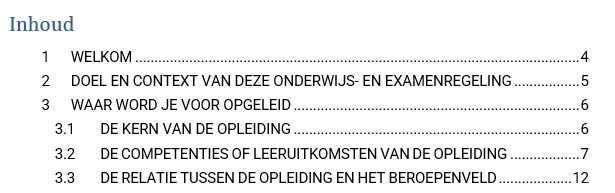

In [4]:
display(Image(filename='Afbeeldingen/inhoud.JPG'))

``Tabellen``: De tabellen bevatten waardevolle informatie voor de chatbot. Echter staan de gegevens momenteel in tabelvorm, en deze moeten worden omgezet naar tekst. We moeten onderzoeken hoe we dit efficiënt kunnen omzetten.


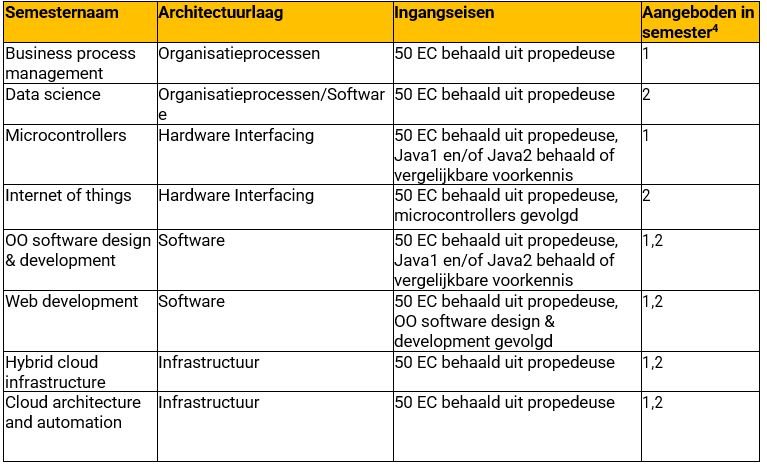

In [5]:
display(Image(filename='Afbeeldingen\Tabel.JPG'))

``Voorblad``: Het voorblad levert geen bruikbare informatie op en kan in de data preparation worden verwijderd.

Verder moeten we onderzoeken of we het Word-bestand kunnen gebruiken zoals het is, of dat we het moeten converteren naar een tekstbestand (.txt).

Actie punten voor data prep:
- Afbeeldingen verwijderen.
- Inhoud verwijderen
- Voorblad verwijderen

Daarnaast moeten we een snelle en effectieve manier vinden om de tabellen om te zetten naar tekst, aangezien deze informatie te belangrijk is om weg te laten. We moeten dus onderzoeken of we dit handmatig of automatisch kunnen uitvoeren.

---

# Data Preparation

[[ go back to the top ]](#Table-of-contents)

Het klaarmaken van de data voor het modelleren bestond uit twee gedeeltes:
1. Data formatteren zodat deze schoon en geordend verwerkt kan worden
2. Aanmaken van een database van waaruit de semantische zoekopdrachten uit kunnen worden gevoerd

## Formatteren van de data

### TXT
In eerste instantie kozen we ervoor om het Word-bestand om te zetten naar een .txt-bestand. Dit deden we omdat we de code van Mischa gebruikte die .txt-bestanden gebruikte, waardoor we snel konden testen of de chatbot werkte. Later bleek echter dat dit niet de ideale manier was. Hieronder staat de eerste data preparation, met de latere oplossing waarbij we geen .txt meer hebben gebruikt.

Tijdens de data understanding ontdekten we dat bepaalde onderdelen uit het document verwijderd moesten worden. Aangezien het weinig tijd kostte om afbeeldingen, het voorblad en de inhoudsopgave te verwijderen, besloten we dit handmatig te doen.

Nadat we deze overbodige stukken tekst hadden verwijderd, hebben we het Word-bestand via Word omgezet naar een .txt-bestand. Het omzetten naar .txt verliep echter niet soepel, en het bestand was slecht leesbaar, zoals te zien is op de afbeelding.

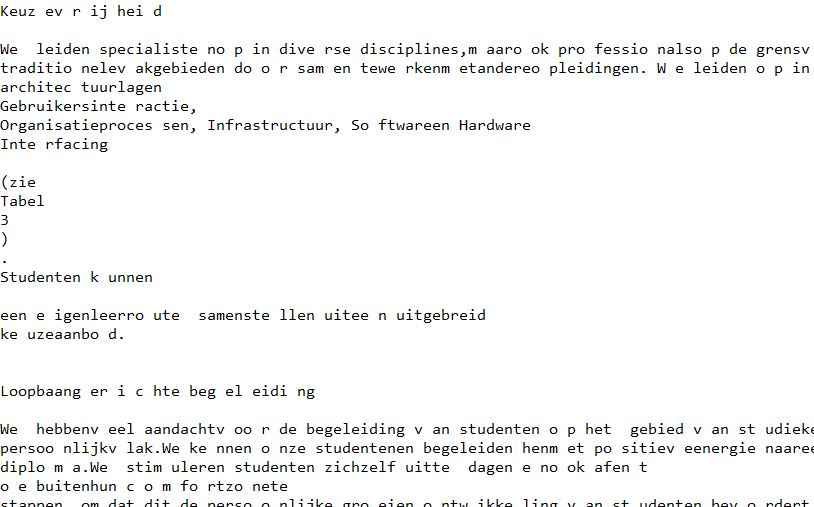

In [6]:
display(Image(filename='Afbeeldingen/1erun.JPG'))


In het .txt-bestand zagen we al snel dat de tabellen niet zichtbaar waren, dus hebben we de tabellen omgezet naar tekst met een functie binnen Word. Ook dit werkte niet helemaal goed, dus hebben we ChatGPT gevraagd het .txt-bestand netjes om te zetten naar een .txt-bestand. Dit zag er al een stuk beter uit, maar het was nog steeds niet wat we wilden bereiken.

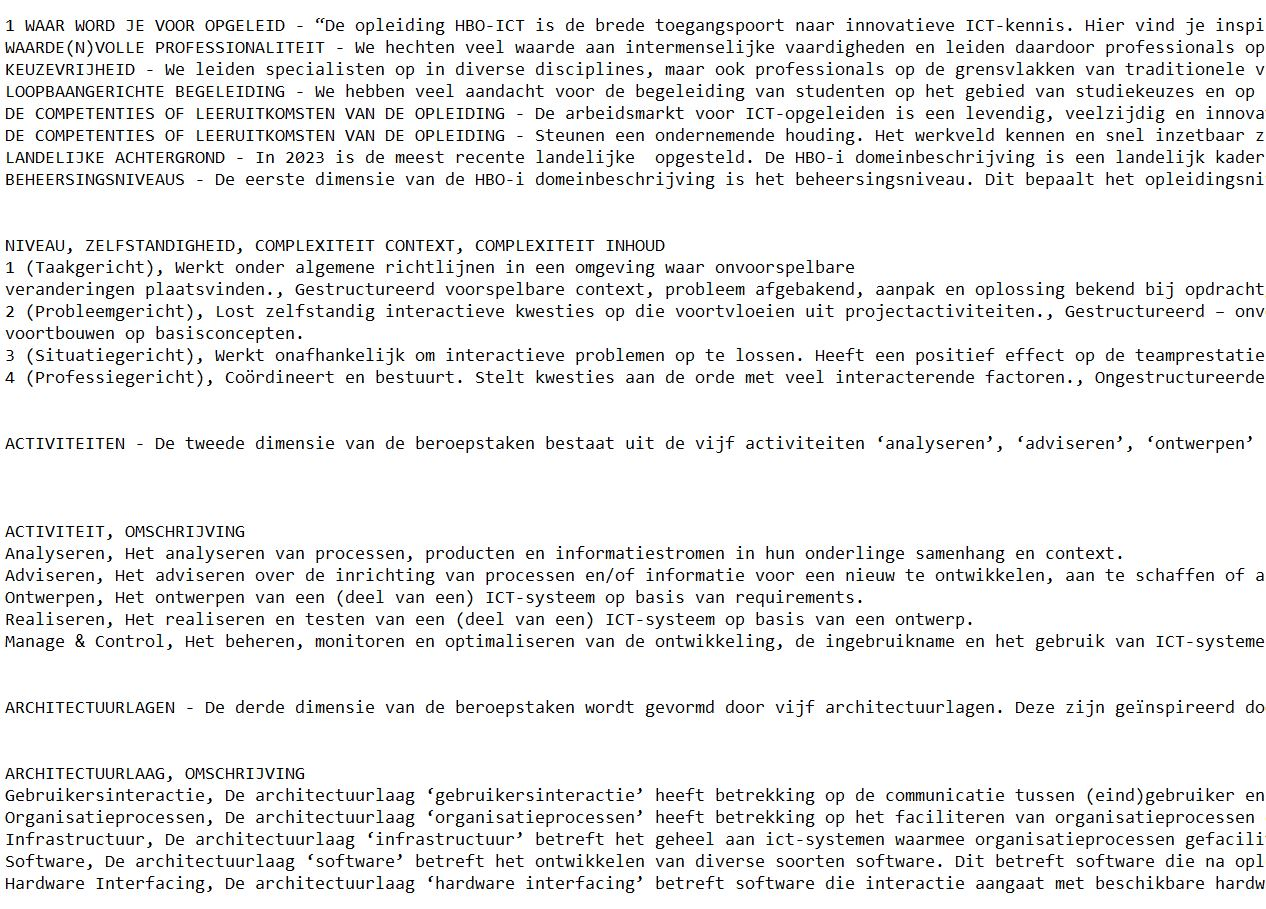

In [7]:
display(Image(filename='Afbeeldingen/optie2.JPG'))


Na deze stap hebben we gekeken hoe Mischa's code werkt met een .txt-bestand, en op basis daarvan hebben we het .txt-bestand handmatig aangepast en getest met zijn spellingsmodel. Het .txt-bestand zag er uiteindelijk als volgt uit.

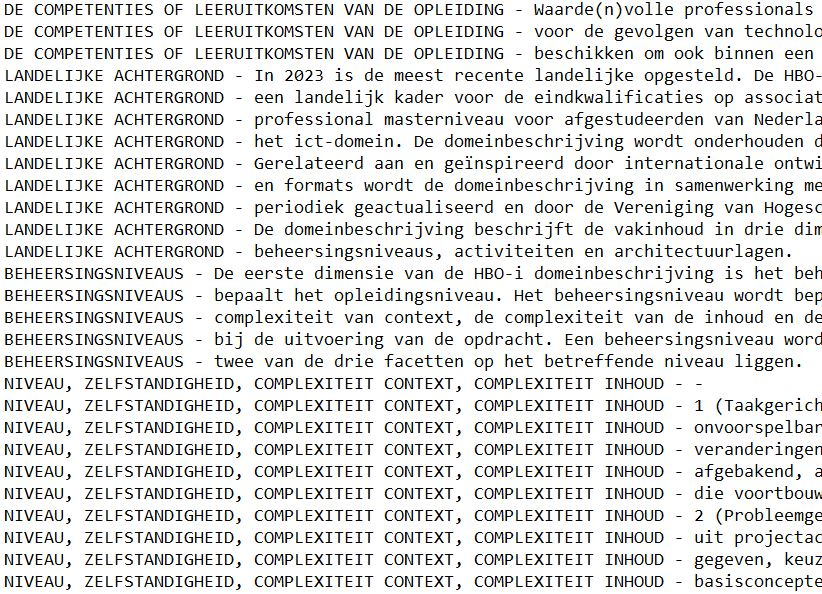

In [8]:
display(Image(filename='Afbeeldingen/3erun.JPG'))


We merkten echter dat het model weinig uit het .txt-bestand haalde en voornamelijk op voorspellingen werkte. Dit kwam waarschijnlijk doordat de tekst niet goed per kopje op een lijn stond. Het model maakte geen gebruik van de informatie uit het .txt-bestand, dus zijn we verder gaan onderzoeken naar betere opties om tot een beter resultaat te komen.

### JSON

Uiteindelijk hebben we de oplossing gevonden via de volgende [generator website](https://cloud.llamaindex.ai/parse). We hebben het gefilterde .docx-bestand zonder afbeeldingen en voorblad geüpload en omgezet naar een JSON-bestand. We kozen uiteindelijk voor JSON boven .txt of .md, omdat we een [script](https://github.com/dodeeric/json-files-ingestion-into-chroma-vector-db/blob/main/app.py) vonden dat JSON-bestanden kon verwerken.

Na verder onderzoek bleek ook dat JSON gemakkelijker de hoofdstukken op een logische manier indeelt, iets wat niet goed gebeurde in het .txt-bestand.

Aangezien SemDB voor ons allemaal nieuw was, hebben we het proces misschien niet optimaal aangepakt, maar dit was voor ons nodig om uiteindelijk een bruikbare manier te vinden om het .docx-document om te zetten naar een JSON-bestand dat geschikt is voor onze chatbot.

## Aanmaken van een Database

De volgende code is geïnspireerd door [Mischa's artikel op Medium](https://medium.com/@xvtjy/rag-implementation-using-keras-nlp-and-chromadb-34c6868dd908), we hebben eerst zijn code werkend gekregen met de spells. Daarna hebben we ons eerste concept dus draaiende gekregen met het `.txt-bestand`.

Omdat niet alle code even logisch was hebben we met **ChatGPT** overal comments aan toegevoegd om beter de code te begrijpen.

In [60]:
# Import de Llama library voor het werken met Llama-modellen van Llama.cpp
from llama_cpp import Llama

# Import chromadb voor het werken met een database voor het opslaan en ophalen van vectoren en documenten
import chromadb

# import logging zodat 'add' message wordt uitgeschakeld bij het toevoegen van een item aan een collectie
import logging

# import json om json bestanden in te laden en te verwerken
import json

# Waarschuwingen negeren om een schonere uitvoer te krijgen
import warnings
warnings.filterwarnings('ignore')

Dit is de verwerking van de code op basis van de tekst bestanden

In [24]:
# Lijsten om documenten, metadata en ID's op te slaan
documents = []
metadata = []
ids = []
counter = 0

# Open het tekstbestand met een specifieke encoding
with open('data/Opleidngsdeel_OER_HBO-ICT_Zwolle_2024-2025_Filterd_Modified_Long_Lines.txt', 'r', encoding='utf-8') as lines:
    # Loop door elke regel in het bestand
    for line in lines:
        # Splits de regel op basis van het scheidingsteken " - "
        line = line.split(" - ")  
        
        # Voeg het tweede deel van de gesplitste lijn toe aan de metadata als een dictionary
        metadata.append({'kopje': line[1]})  
        
        # Voeg het eerste deel van de gesplitste lijn toe aan de documentenlijst
        documents.append(line[0])  
        
        # Voeg een unieke ID toe aan de IDs-lijst op basis van de teller
        ids.append(str(counter))  
        
        # Verhoog de teller voor de volgende ID
        counter += 1  

# Print de lijst van ID's naar de console
print(ids)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

Als database hebben wij gekozen voor ChromaDB. Dit is conform de voorbeelduitwerking en het werkt naar behoren. Wij hebben wel geprobeerd andere semantische databases op te zoeken of te benaderen (er is contact gezocht met semanticdb.ai), maar vanwege de scope van de opdracht hebben wij hier geen wijzigingen aan toegevoegd

In [61]:
# Schakel notificaties uit bij het toevoegen van een item aan chromadb
logging.getLogger("chromadb").setLevel(logging.ERROR)

# Maak een client aan voor de Chroma database
client_txt = chromadb.Client()

# Maak een collectie met de naam "information"
collection_txt = client_txt.get_or_create_collection("information")

# Voeg de documenten, metadata en ID's toe aan de collectie
collection_txt.add(
    documents=documents,    # De lijst van documenten die zijn ingeladen
    metadatas=metadata,     # De bijbehorende metadata voor de documenten
    ids=ids                 # De unieke ID's voor elk document
)

Hieronder volgt de verwerking op basis van het JSON bestand

In [62]:
# Initialiseren van de ChromaDB client
client_json = chromadb.Client()

# Ophalen of aanmaken van een collectie binnen ChromaDB om de informatie te bewaren
collection_json = client_json.get_or_create_collection("information")

# Inlezen van het OER-JSON-bestand en voorbereiden van de data
with open('data/OER.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file) 
    documents = [item['text'] for item in data]  # Lijst van tekst uit de JSON
    metadata =  [{'page': item['page'], 'title': item.get('title', 'unknown')} for item in data]  # Lijst van metadata (paginanummers en titels)
    ids = [str(i) for i in range(len(data))]  # Unieke IDs voor elke document
    collection_json.add(documents=documents, metadatas=metadata, ids=ids)  # Toevoegen aan de ChromaDB-collectie

# Modeling

[[ go back to the top ]](#Table-of-contents)


---

Wij hebben het volgende model gekozen:
- GEITje-7B-ultra-GGUF

Op aanraden van de docenten zijn wij begonnen met hoe wij GEITje kunnen gebruiken. Dit is een Nederlandse versie van mistral LLM. Voor ons was het logisch om alleen GEITje te onderzoeken omdat wij een Nederlandse chatbot willen maken en daarvoor dus een Nederlandse LLM nodig hebben.

Het viel ons op dat er meerdere versies van GEITje aanwezig zijn. Wij hebben daarom ook gekeken naar het installatieproces. Voor veel modellen van HuggingFace hebben wij de package "transformers" nodig. Niet iedereen kreeg die aan de praat, en daarom hebben wij de package "llama_cpp-python" gebruikt. Deze is compitabel met de GEITje-7B-ultra-GGUF llm van BramVanroy.

Onderstaande code is dan van HuggingFaces afgehaald om de llm op te halen

In [50]:
# Laad een voorgetraind Llama-model
llm = Llama.from_pretrained(
    repo_id="BramVanroy/GEITje-7B-ultra-GGUF",  # Het ID van de modelrepository
    filename="geitje-7b-ultra-q8_0.gguf",         # Het bestand van het model
)

# Maak een chat-completion aan met een voorbeeldbericht van de gebruiker
llm.create_chat_completion(
    messages=[
        {
            "role": "user",                    # Rol van de afzender (hier: user)
            "content": "Wat is de hoofdstad van Frankrijk?"  # Voorbeeldvraag
        }
    ]
)

llama_model_loader: loaded meta data with 26 key-value pairs and 291 tensors from C:\Users\raymo\.cache\huggingface\hub\models--BramVanroy--GEITje-7B-ultra-GGUF\snapshots\00da1c06460774d6982d608e495dac102ead3ec1\.\geitje-7b-ultra-q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = geitje-7b-ultra
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 32768
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:            

{'id': 'chatcmpl-5eec2663-29cd-4af5-a2ab-0498f61418b6',
 'object': 'chat.completion',
 'created': 1729249080,
 'model': 'C:\\Users\\raymo\\.cache\\huggingface\\hub\\models--BramVanroy--GEITje-7B-ultra-GGUF\\snapshots\\00da1c06460774d6982d608e495dac102ead3ec1\\.\\geitje-7b-ultra-q8_0.gguf',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'De hoofdstad van Frankrijk is Parijs. Parijs staat bekend als de "Lichtstad" en is een van de meest iconische steden ter wereld. Het is niet alleen de hoofdstad van Frankrijk, maar ook een cultureel, economisch en politiek centrum van het land. Parijs huisvest vele bezienswaardigheden, zoals de Eiffeltoren, de Notre-Dame en het Louvre, evenals tal van kunstgalerijen, parken en historische plekken.'},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 27, 'completion_tokens': 125, 'total_tokens': 152}}

Hieronder vragen wij de gebruiker om input en wordt een voorgestelde antwoord uit de ChromaDB opgehaald

In [69]:
# Vraag de gebruiker om een vraag in te voeren
user_input = input("Wat is jouw vraag?: ")

# Voer een query uit op de collectie met de gebruikersvraag
results = collection_json.query(
    query_texts=[user_input],  # De tekst van de gebruikersvraag
    n_results=1                 # Het aantal resultaten dat moet worden opgehaald
)
results

# Distance wordt gebruikt om de relevantie van de vraag te koppelen aan het antwoord. Hiermee kunnen we zien of de gestelde vraag binnen de context van het OER valt.
distance = results['distances'][0][0]

In [70]:
# Verwerk de eerste metadata en het eerste document uit de resultaten
result = results['metadatas'][0][0]['kopje'] + " - " + results['documents'][0][0][:-1]
result

'Er zijn verschillende vormen om een deel van je studie in het buitenland te\n - STUDEREN IN HET BUITENLAN'

In het onderstaande wordt het voorgestelde antwoord meegegeven in een prompt aan het GEITje LLM. Dit is conform het RAG principe

In [72]:
# We hebben een distance gekozen van minder dan 0.95. Met een trial-and-error werkte dit het beste.
# Hierdoor kunnen we 'niet relevante' vragen negeren
if distance < 0.95:
    # Maak een prompt voor het Llama-model op basis van de resultaten en gebruikersinvoer
    prompt = f"""
            Voorgestelde antwoord: {result}
            User input: {user_input}
            Je bent een chatbot voor HBO-ICT aan Windesheim en je mag alleen gegevens uit de OER halen. 
            Geef een duidelijk en samenhangend antwoord in 3-20 zinnen zonder ongewenste tekens aan het begin. 
            Focus op zelfstandige naamwoorden in de vraag. Hallucineer niet. 
            Bij geen antwoord zeg 'Geen duidelijke resultaten gevonden'. 
            Geef geen delen van de prompt of de vraag terug en gebruik niet het woord 'antwoord:'.
            """

    # Genereer een nieuw antwoord met het Llama-model op basis van de gemaakte prompt
    inference = llm(prompt, max_tokens=1000)  # Beperk het aantal tokens in de output
    generated_text = inference['choices'][0]['text']  # Verkrijg de gegenereerde tekst
    print("Inference: ", generated_text)  # Print de gegenereerde output
else:
    prompt="Geen resultaten gevonden, vraag iets uit de OER"
    generated_text = prompt

Llama.generate: 227 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    8536.33 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   284 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  160558.62 ms /   285 tokens


Inference:  
```

Om door te stromen naar de hoofdfase van je studie in HBO-ICT aan Windesheim moet je meestal voldoen aan het behalen van een bepaald aantal studiepunten (EC's, Europese Credits). Het exacte aantal EC's dat nodig is, kan variëren per studierichting en afhankelijk van de specifieke eisen van jouw opleiding.

De OER (Onderwijs- en Examenregeling) van Windesheim bevat gedetailleerde informatie over de eisen voor het behalen van je propedeuse, oftewel het eerste jaar van je studie, wat vaak gelijk staat aan 60 EC's, en hoe deze EC's zijn verdeeld over de verschillende onderdelen van je programma. Het is belangrijk om de OER van je specifieke opleiding te raadplegen voor de exacte informatie betreffende de doorstroommogelijkheden en het behalen van de vereiste studiepunten.

Indien je geïnteresseerd bent in het verder studeren aan een vergelijk


## Flask Applicatie

Nadat deze code van Mischa werkte met het .txt bestand zijn we begonnen met het kijken om de Data Preparation te verbeteren. Dat is toen we erachter kwamen dat we hiervoor [LlamaParse](https://docs.llamaindex.ai/en/stable/llama_cloud/llama_parse/) konden gebruiken. Met deze website hebben we dus het `.json` bestand gegenereerd die we hebben gebruikt voor de Flask Applicatie.

### Flask App Structuur voor de OERbotje Chatbot

We hebben een bepaalde structuur gemaakt voor de app omdat we styling (.html/ .css) hebben toegepast. De structuur ziet er als volgt uit:

```markdown
flask_app/
│
├── app.py                         # Hoofd Python-bestand met de Flask-applicatie
├── requirements.txt               # Lijst met benodigde Python-pakketten
│
├── templates/                     # Bevat HTML-sjablonen
│   └── index.html                 # Hoofd HTML-bestand voor de app (Bevat HTML, CSS en JavaScript)
│
└── data/                          # Bevat de gegevensbestanden
    └── OER.json                   # JSON-bestand met OER-gegevens
```

Het framework van de app hebben we gegenereerd met **ChatGPT**. We hebben deze keuze gemaakt omdat we nog nooit met 'Flask' hebben gewerkt. Na wat onderzoek ernaar hebben we dit meegegooid in een prompt samen met de casus en het notebook hierboven. met de instructie om een simpele Flask-app hiervan te maken. Dit resulteerde in een simpele Flask-app bouwen met een eenvoudige HTML-pagina waarin getypt kon worden en een knop aanwezig was om op te drukken om een antwoord te genereren.

<figure>
    <img src="afbeeldingen/eerste_flaskapp.png" alt="Eerste Flask App" width="600"/>
    <figcaption>Hoe de eerste versie van de flask app eruit zag.</figcaption>
</figure>

---

Een groot punt nadat we de Flask-App draaiende hadden was om het antwoord te verbeteren met `Prompt Engineering;` het model hallucineerde best vaak wanneer hij niet wist waar hij in het OER moest zoeken. We hebben hem uiteindelijk daarom deze prompt meegegeven:

```markdown
*"Je bent een chatbot die studenten helpt met vragen over het Onderwijs- en Examenreglement (OER) van Windesheim, specifiek voor de opleiding HBO-ICT.Beschrijf dit in maximaal 3 duidelijke zinnen. Zorg ervoor dat de output geen halve zinnen of ongewenste tekens aan het begin van de tekst bevat. Geef het antwoord zonder extra inleiding of kopjes en zorg ervoor dat het een volledige en samenhangende tekst is. Focus je alleen op zelfstandignaamwoorden in de vraag. Je mag niet halliciuneren. Als er geen antwoord op de vraag is geef je 'Geen resultaten gevonden'.*"
```

Dit was iets waar we wel veel mee hebben geknutseld. Uiteindelijk waren we wel vrij tevreden met het resultaat. Uiteindelijk hebben we de interface van de app verbeterd. Hiervoor hebben we wel **ChatGPT** gebruikt omdat Flask nieuw voor ons was en omdat we allemaal weinig ervaring hebben met HTML, CSS en JavaScript.

De belangrijkste dingen die we hebben toegevoegd aan de interface is dat je kan zien dat het model bezig is met een antwoord genereren en dat je de chat geschiedenis kan zien. Niet te verwarren met het feit dat het model de chat geschiedenis onthoudt bij het beantwoorden van nieuwe vragen.

# Evaluation 

[[ go back to the top ]](#Table-of-contents)

## Screenshots resultaten toevoegen

Hieronder zijn twee screenshots toegevoegd:
1. Eentje met een relevante vraag en antwoord

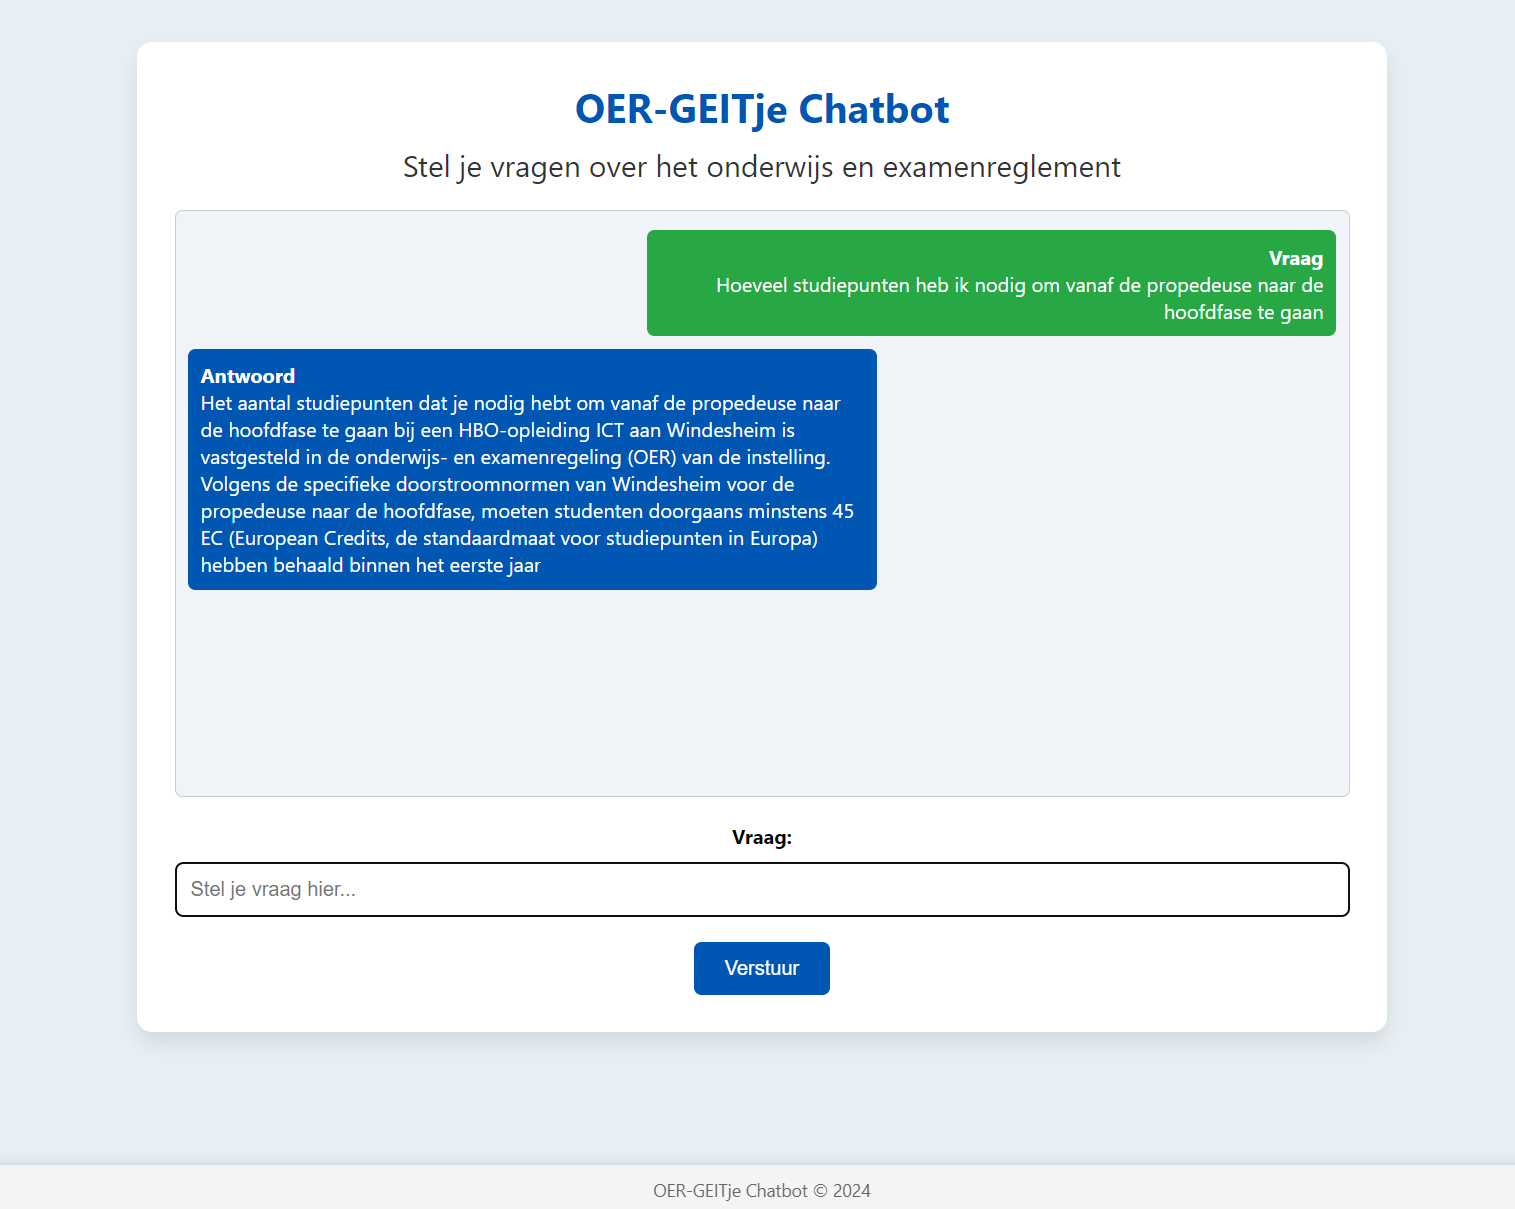

In [57]:
display(Image(filename='Afbeeldingen\output1.png'))

2. Eentje waarbij de vraag buiten de scope van de OER is

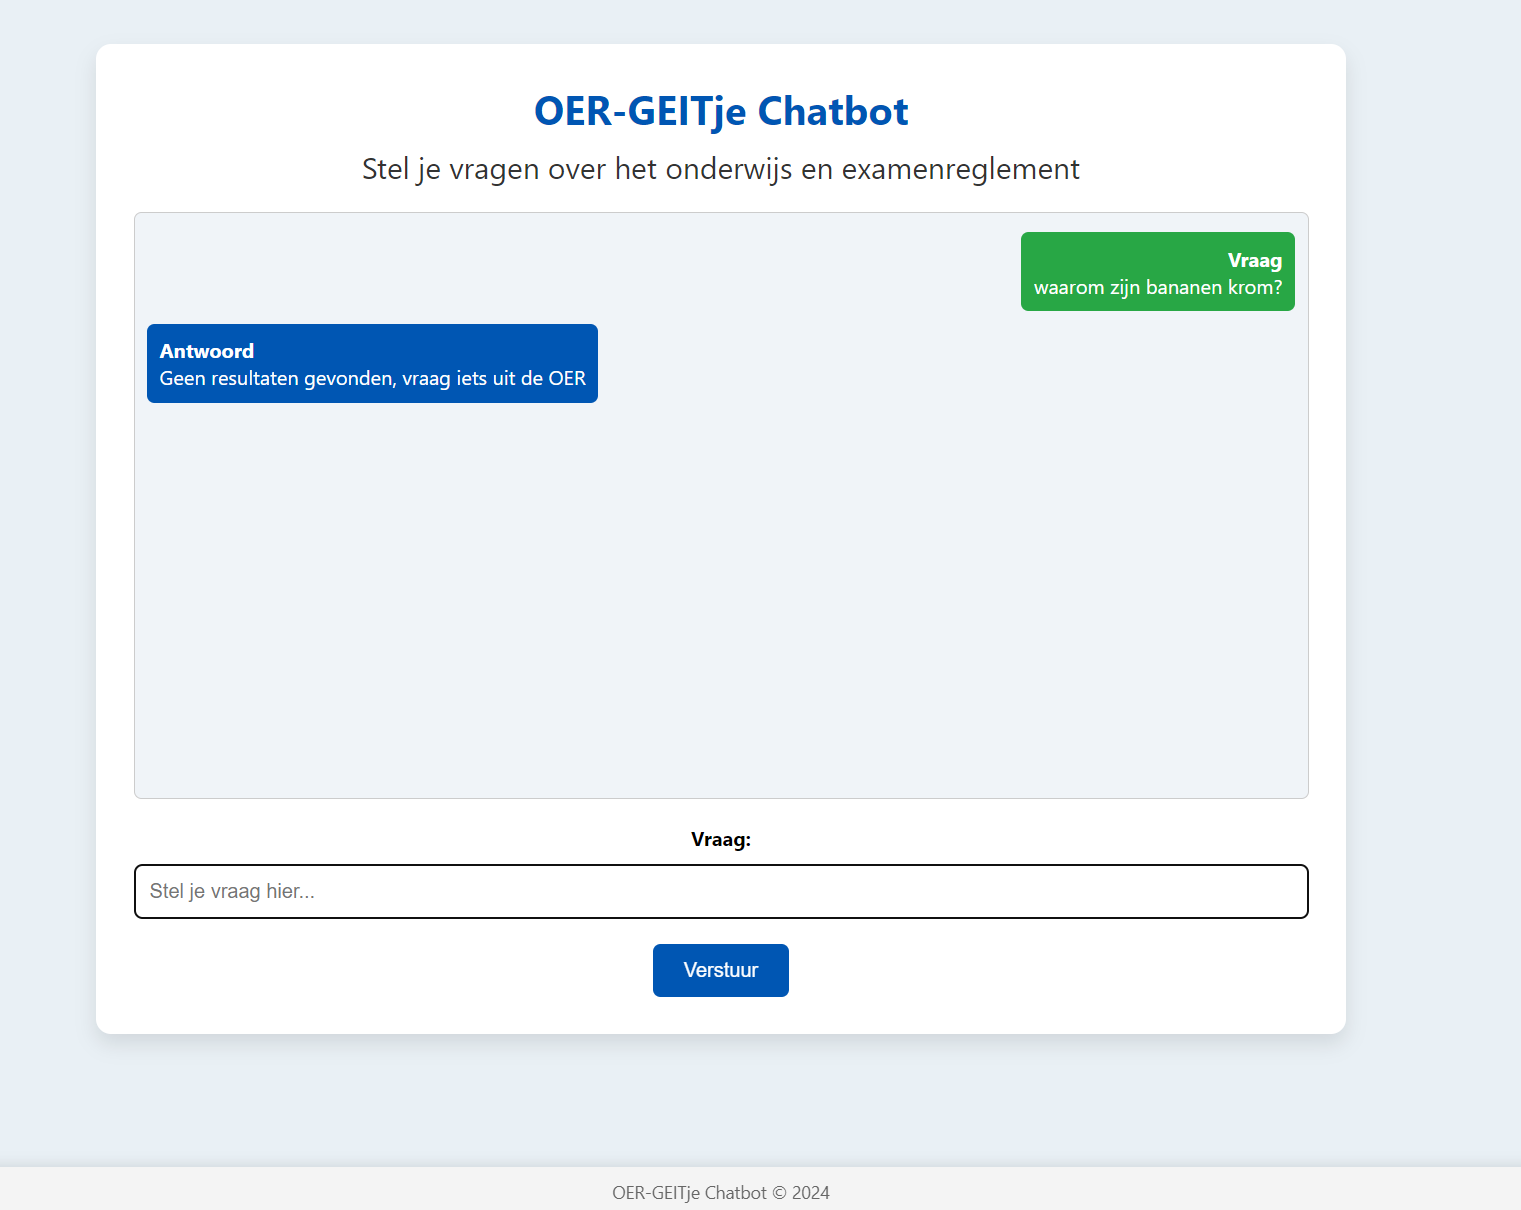

In [59]:
display(Image(filename='Afbeeldingen\output2.png'))

## Terugkoppelen KPI's

Bij het evalueren van de prestaties van onze Flask-app en de onderliggende chatbot zijn er enkele belangrijke aandachtspunten naar voren gekomen.

### Onbetrouwbare Informatiebronnen
Eén van de grootste uitdagingen is dat het model soms niet de OER als bron gebruikt en in plaats daarvan zelf antwoorden verzint. Dit leidt tot antwoorden die simpelweg niet kloppen,  vooral omdat de chatbot bedoeld is om studenten nauwkeurige en relevante informatie over het Onderwijs- en Examenreglement (OER) te bieden. Ondanks onze inspanningen om `Prompt Engineering` toe te passen, blijft het model af en toe antwoorden genereren die niet op informatie uit het OER zijn gebaseerd.

### Hallucinatie en Onvolledige Antwoorden
Daarnaast hebben we gemerkt dat het model nog steeds soms hallucinaties vertoont. Soms geeft het model geen volledige zinnen terug, wat resulteert in afgekapte of onduidelijke antwoorden. 

### Tijdsduur voor Antwoordgeneratie
Een ander belangrijk punt is de tijd die het model nodig heeft om antwoorden te genereren. Op dit moment duurt het ongeveer `een minuut per vraag` (afhankelijk van de hardware) voordat een antwoord wordt teruggegeven. De lange wachttijd kan worden veroorzaakt door verschillende factoren, waaronder de complexiteit van de vragen, de omvang van de dataset waarmee het model werkt en de prestaties van de laptop waarop de Flask-app is gehost.

---

# Deployment

[[ go back to the top ]](#Table-of-contents)

Met de ontwikkeling van onze Flask-app zijn we ons ervan bewust dat er nog veel kansen zijn voor verdere verbetering en uitbreiding van het model:

### Chatgeschiedenis
Een eerste stap die we willen nemen, is het implementeren van een functie voor `chatgeschiedenis`. Dit zou het model in staat stellen om eerder gestelde vragen te onthouden en deze contextueel mee te nemen in de antwoorden. Hierdoor kan de chatbot relevanter en nauwkeuriger reageren op opvolgende vragen.

### Meerdere Documenten Ondersteunen
Daarnaast willen we het model uitbreiden zodat het niet alleen een OER-bot is voor de opleiding HBO-ICT, maar ook voor `andere studies`. Dit zou je kunnen doen door een structuur te ontwikkelen die het mogelijk maakt om meerdere documenten eenvoudig te integreren. Dit vereist een uitgebreidere app dan wat we momenteel hebben, maar het zou een waardevolle uitbreiding zijn die ons bereik en de functionaliteit van de chatbot aanzienlijk vergroot.

### Hosting op een Externe Server
Momenteel draait onze app nog op `localhost`, maar we overwegen om deze te hosten op een server van Windesheim, zoals Skylab of een vergelijkbare omgeving. Dit zou de toegankelijkheid van de app verbeteren en het mogelijk maken dat meer studenten gebruik kunnen maken van de chatbot.

### Verbetering van het Model
Ten slotte moet ons model in het algemeen verder `worden verbeterd`. Het is cruciaal dat de chatbot alleen antwoorden genereert op basis van de beschikbare documentatie, in dit geval de OER. Als het model geen relevant antwoord kan vinden, moet het eenvoudigweg aangeven dat het de vraag niet begrijpt en aanmoedigen om deze anders of eenvoudiger te formuleren. Deze aanpak zou niet alleen hallucinaties verminderen, maar ook de betrouwbaarheid van de chatbot verhogen, waardoor het een betrouwbaarder hulpmiddel wordt voor studenten.

---